## <span style="color: rgb(204, 219, 219); font-weight: bold;">The Northampton Council Project:</span>


There has been a significant increase in sickness and hospital admissions in Northampton. In response to this concerning trend, the town council has decided to conduct diagnostic research to identify the underlying causes and develop effective mitigation strategies.  

### <span style="color: rgb(158, 235, 235); font-weight: bold;">Objectives:</span>


- What are the most common medical conditions in the town?  
- How can these medical conditions be mitigated across the city?  
  - Which gender experiences the most common medical conditions?  
  - Which age groups within this gender are most affected?  
  - Are certain blood types more prone to specific medical conditions?  
  - What factors contribute to **inconclusive** test results, and how can they be minimized in future diagnoses?  
  - Which medical conditions are classified as urgent and emergencies, allowing the council to address the issues at their root?  
- Which medical conditions require the longest hospital stays?  
- How are different hospitals specialized in treating specific medical conditions, and how can this information be used to implement effective mitigation strategies?  
- What are the test results associated with these medical conditions to better understand their nature?  



In [19]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
from ipyleaflet import Map

In [45]:
df = pd.read_csv(r'Data\healthcare_dataset.csv')

In [46]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


Data Asessment

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Seeing there are no mull cells or columns and the datatypesn of each colukmns have been correctly labelled

In [23]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [38]:
# @interact(hue=df['RiskLevel'])
# def plot(hue):
#     _=sns.countplot(df, hue=hue)



In [40]:
@interact(hue=['RiskLevel']) 

def plot(hue):
    plt.figure(figsize=(8, 6))  # Optional for better display

    # Ensure 'RiskLevel' exists before calling countplot
    if hue in df.columns:
        _ = sns.countplot(data=df, x=hue)
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed
        plt.show()
    else:
        print(f"Error: '{hue}' is not a column in the DataFrame")


interactive(children=(Dropdown(description='hue', options=('RiskLevel',), value='RiskLevel'), Output()), _dom_…

In [42]:
# @interact(hue=['RiskLevel']) 

# def plot(hue):
#     plt.figure(figsize=(8, 6))  # Optional for better display

#     # Ensure 'RiskLevel' exists before calling countplot
#     if hue in df.columns:
#         sns.countplot(data=df, x=hue)
#         plt.xticks(rotation=45)  # Rotate x-axis labels if needed
#         plt.show()
#     else:
#         print(f"Error: '{hue}' is not a column in the DataFrame")


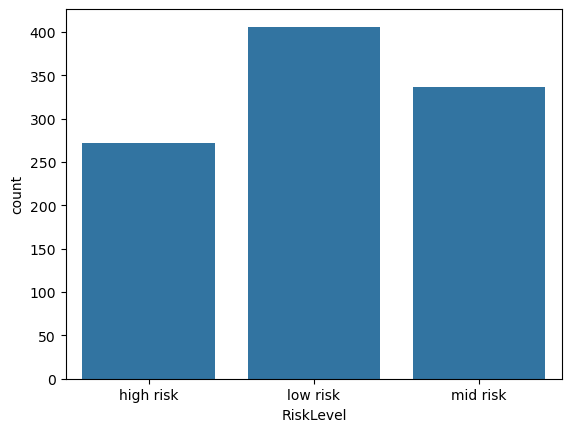

In [43]:
_ = sns.countplot(data=df, x='RiskLevel')


<Axes: xlabel='RiskLevel', ylabel='count'>

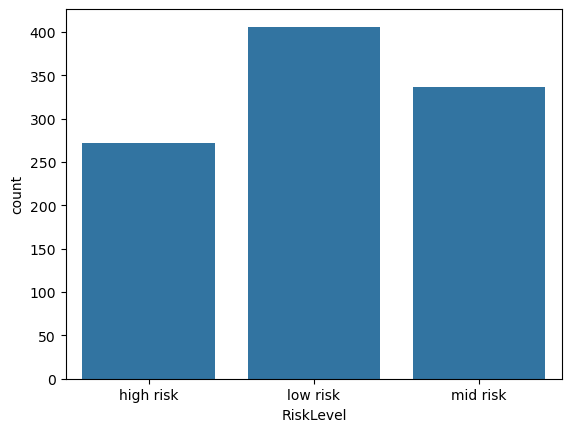

In [44]:
sns.countplot(data=df, x='RiskLevel')


In [39]:
# sns.countplot(data = df, x='RiskLevel');

# # df['RiskLevel']

We deasling with an imbalanced dataset.

- This could easily be a case where ofthe 1014 women _majority_ of them  had low-risk level 
    - 9This intepretes to the factb in the year 2024- when the dat was gotten within the Northampton town- knowing we have other hospitals (reseach shows 13 hospitaols in general- private and public)- this data represents 1/12 hospitals- which is fair represntation of the qwomen in Northampton- and may be fairly alright to generalize that most-women there have low-risklevels during maternity.
OR
- The represnetation of clients acould also be that the low-riosk individuals all came to the Invincible Hospital, and High-risk went to the other 11 hospitals. This may be location-based- as Nortyhampton is big- hospitals are scattered around and perhaps, where the Invincible Hosdpital is located is where you have wpme whose natual rioisk-level is low 9Probably, rural and serene or quiet areas- with less strees or traffic that could have affected their test results)
OR
- Time fadcrtor- if majority of the women gave birth during a period or their test resulst were collected mostly December (a month before their due delivery) and that's a period most wome get to relaxc (perhaps break from work or summer or close to a festive period or when they travel with their partners), this is another causal factor on why most women's risk-levels are Low.